# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 12</center>

# <center>KMean Clustering</center>

![image-14.png](attachment:image-14.png)

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Train test Split </li>
<li> Train Linear Model</li>
<li> Train Non Linear Model</li>
<li> Train Complex Model </li>
<li> Train Regularized Model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use Kmean algorithm to implement unsupervised clustering for iris dataset.

By the end of the lab, you should be able to :
- Differentiate supervised and unsupervised learning.


- Implement Kmean clustering any given dataset.





## <font color = blue>1. Loading Data

    - Lets load iris dataset for clustering. Note that you don't have to include target for unsupervised learning.
    

In [1]:
#import libraries first
import pandas as pd
import numpy as np


In [8]:
#Load datasets
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

## <font color = blue> 2. Data Manipulationa and visualization

In [12]:
#visualize your data here
df.drop(columns=['sepal length (cm)','sepal width (cm)'],inplace = True)
df.head()

petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

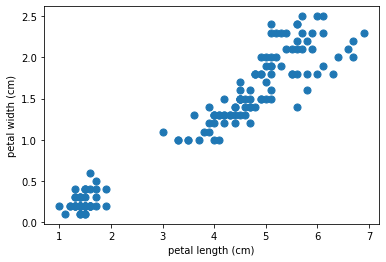

In [13]:
df.plot.scatter(x = 'petal length (cm)', y = 'petal width (cm)', s=50)

## <font color = blue> 3. Train model

In [34]:
#train your model here
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = df
Kmean = KMeans(n_clusters = 2)
Kmean.fit(X)


KMeans(n_clusters=2)

## <font color = blue> 4. Explore KMeans attributes

In [35]:
#check Kmean algorithm's attribute
Kmean.cluster_centers_



array([[4.92525253, 1.68181818],
       [1.49215686, 0.2627451 ]])

In [36]:
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
Kmean.feature_names_in_

array(['petal length (cm)', 'petal width (cm)'], dtype=object)

In [38]:
Kmean.inertia_

86.39021984551395

In [39]:
Kmean.n_iter_

3

In [40]:
Kmean.n_features_in_

2

## <font color = blue> 5. Prediction

In [41]:
#create sample data to make prediction. Interpret your output for unsupervised clustering
predict_data = Kmean.predict([[7, 3.5]])
print(predict_data)

[0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


## <font color = blue> 6. Plotting clusters with thier centroids

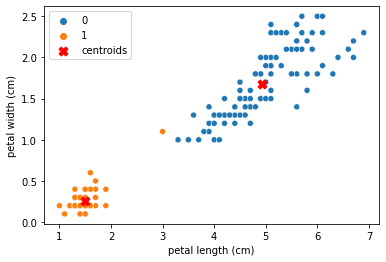

In [42]:
# Plot your datapoints and show the clusters in different colors along with thier cluster centroids.
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue=Kmean.labels_)
plt.scatter(Kmean.cluster_centers_[:,0], Kmean.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

## <font color = blue> 7. Use elbow method to choose K for Kmean

In [47]:
# plot grah to decide K value for given dataset.
from scipy.spatial.distance import cdist
distortions = []
K = range(1,18)
print(K)



range(1, 18)


In [48]:
for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeans_model.cluster_centers_,"euclidean"),axis=1))/X.shape[0])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [49]:
distortions

[1.707364436891335,
 0.583920126422277,
 0.36876646966749166,
 0.2995555809034137,
 0.26508349289751987,
 0.23283408287736876,
 0.2143209017519033,
 0.1958433184866062,
 0.18410484384588674,
 0.1707860826864532,
 0.16258214161394124,
 0.15654061774815767,
 0.15395570133275002,
 0.14599041774414562,
 0.13682518085811185,
 0.13498502075144692,
 0.13045461393695007]

range(1, 18)
0.13045461393695007


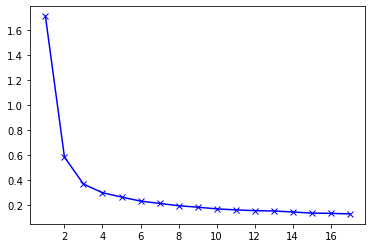

In [50]:
print(K)
print(np.min(distortions))
plt.plot(K,distortions,'bx-')